<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Keep part in this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

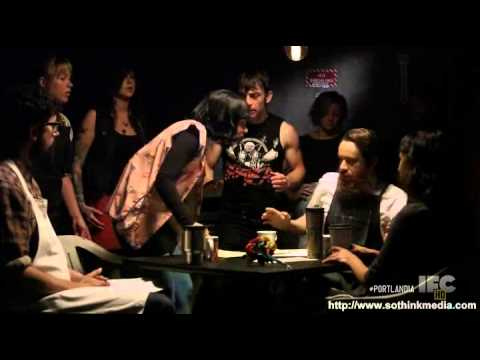

In [ ]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [ ]:
%pwd

'/home/damack/Repos/DS-Unit-4-Sprint-1-NLP/module1-text-data'

In [ ]:
import pandas as pd

# url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv('./data/yelp_coffeeshop_review_data.csv')
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [ ]:
shops.tail()

,coffee_shop_name,full_review_text,star_rating
7611,The Steeping Room,2/19/2015 I actually step into this restauran...,4.0 star rating
7612,The Steeping Room,"1/21/2016 Ok, The Steeping Room IS awesome. H...",5.0 star rating
7613,The Steeping Room,"4/30/2015 Loved coming here for tea, and the ...",4.0 star rating
7614,The Steeping Room,8/2/2015 The food is just average. The booths...,3.0 star rating
7615,The Steeping Room,5/23/2015 I finally stopped in for lunch with...,4.0 star rating


In [ ]:
# Start here 
import re

shops['star_rating'] = shops['star_rating'].str.replace(' star rating', '')
shops['star_rating'] = shops['star_rating'].str.strip().astype(float)
shops['full_review_text'] = shops['full_review_text'].str.replace('^.*\d\d\d\d ','')
shops['full_review_text'] = shops['full_review_text'].str.replace('^.*check-in ','')
shops['full_review_text'] = shops['full_review_text'].str.replace('^.*checkin ','')
shops['full_review_text'] = shops['full_review_text'].str.replace('^.*check-ins ','')
shops['full_review_text'] = shops['full_review_text'].str.replace('^.*checkins ','')
shops['full_review_text'] = shops['full_review_text'].str.replace('^.*check in ','')
shops['full_review_text'] = shops['full_review_text'].str.replace('^.*check ins ','')
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,Love love loved the atmosphere! Every corner o...,5.0
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aust...",4.0
2,The Factory - Cafe With a Soul,Listed in Brunch Spots I loved the eclectic an...,4.0
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating How...,2.0
4,The Factory - Cafe With a Soul,They are located within the Northcross mall sh...,4.0


In [ ]:
"""
Import Statements
"""

# Base
from collections import Counter
import re
 
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

nlp = spacy.load("en_core_web_lg")

In [ ]:
nlp.Defaults.stop_words

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

In [ ]:
STOP_WORDS = nlp.Defaults.stop_words.union(['I', 'i', 'coffee', 'Coffee', 'shop', 'shops', 'Shop', 'Shops', 'it', "it's", 'it.', 'the', 'this',])

In [ ]:
TEST_WORDS = "the we mouse'll. They're John."

In [ ]:
get_lemmas(TEST_WORDS)

["mouse'll", 'john']

In [ ]:
# Wrap it all in a function
def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)
    
    # Something goes here :P
    for token in doc: 
        if ((token.is_space == False) and (token.is_alpha == True) and \
            (token.is_stop == False) and (token.is_punct == False) \
            and (token.pos_!= 'PRON') and (token.text.strip() not in STOP_WORDS)):
            lemmas.append(token.lemma_.lower())
    
    return lemmas

In [ ]:
shops['lemmas'] = shops.full_review_text.apply(get_lemmas)

In [ ]:
shops.full_review_text[3:4].apply(get_lemmas)

3    [cool, decor, good, drink, nice, seating, over...
Name: full_review_text, dtype: object

In [ ]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,lemmas,Good_Bad
0,The Factory - Cafe With a Soul,Love love loved the atmosphere! Every corner o...,5.0,"[love, love, love, atmosphere, corner, style, ...",Good
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aust...",4.0,"[list, date, night, austin, ambiance, austin, ...",Good
2,The Factory - Cafe With a Soul,Listed in Brunch Spots I loved the eclectic an...,4.0,"[list, brunch, spots, love, eclectic, homey, p...",Good
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating How...,2.0,"[cool, decor, good, drink, nice, seating, over...",Bad
4,The Factory - Cafe With a Soul,They are located within the Northcross mall sh...,4.0,"[locate, northcross, mall, shopping, center, f...",Good


## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

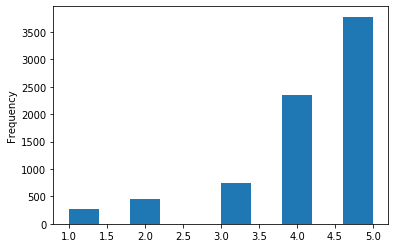

In [ ]:
shops.star_rating.plot(kind='hist')

In [ ]:
# encode good/bad column based on rating
gbcol = {1.0: "Bad",2.0: "Bad",3.0: "Bad",4.0: "Good",5.0: "Good"}
shops['Good_Bad'] = shops['star_rating'].map(gbcol)
shops.head()

,coffee_shop_name,full_review_text,star_rating,lemmas,Good_Bad
0,The Factory - Cafe With a Soul,Love love loved the atmosphere! Every corner o...,5.0,"[love, love, love, atmosphere, corner, style, ...",Good
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aust...",4.0,"[list, date, night, austin, ambiance, austin, ...",Good
2,The Factory - Cafe With a Soul,Listed in Brunch Spots I loved the eclectic an...,4.0,"[list, brunch, spots, love, eclectic, homey, p...",Good
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating How...,2.0,"[cool, decor, good, drink, nice, seating, over...",Bad
4,The Factory - Cafe With a Soul,They are located within the Northcross mall sh...,4.0,"[locate, northcross, mall, shopping, center, f...",Good


In [ ]:

tokenizer = Tokenizer(nlp.vocab)

In [ ]:
shops.full_review_text.value_counts()

Love the Factory. Good coffee, tasty chicken and waffles and awesome atmosphere. Definitely recommend the Nutella waffle.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [ ]:
def tokenize(text):
    """Parses a string into a list of semantic units (words)

    Args:
        text (str): The string that the function will tokenize.

    Returns:
        list: tokens parsed out by the mechanics of your choice
    """
    
    tokens = re.sub(r'[^a-zA-Z ^0-9]', '', text)
    tokens = tokens.lower().split()
    
    return tokens

In [ ]:
shops['tokens'] = shops['full_review_text'].apply(tokenize)

In [ ]:
shops['tokens'].head()

0    [love, love, loved, the, atmosphere, every, co...
1    [listed, in, date, night, austin, ambiance, in...
2    [listed, in, brunch, spots, i, loved, the, ecl...
3    [very, cool, decor, good, drinks, nice, seatin...
4    [they, are, located, within, the, northcross, ...
Name: tokens, dtype: object

In [ ]:
word_counts = Counter()

shops['tokens'].apply(lambda x: word_counts.update(x))

word_counts.most_common(10)

[('the', 34570),
 ('and', 26451),
 ('a', 22549),
 ('i', 20089),
 ('to', 17051),
 ('of', 12516),
 ('is', 11918),
 ('coffee', 10269),
 ('was', 9668),
 ('in', 9360)]

In [ ]:
from collections import Counter
import squarify
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem import PorterStemmer

In [ ]:
word_counts = Counter()

shops['lemmas'].apply(lambda x: word_counts.update(x))

word_counts.most_common(10)

[('place', 6002),
 ('good', 5385),
 ('great', 3936),
 ('like', 3355),
 ('come', 2631),
 ('time', 2381),
 ('love', 2364),
 ('drink', 2327),
 ('austin', 2317),
 ('order', 2144)]

In [ ]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [ ]:
word_count = count(shops['lemmas'])

In [ ]:
word_count.head(50)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
78,place,3865,6002,1.0,0.018165,0.018165,0.507484
131,good,3586,5385,2.0,0.016297,0.034462,0.470851
126,great,2845,3936,3.0,0.011912,0.046374,0.373556
134,like,2259,3355,4.0,0.010154,0.056528,0.296612
359,come,1926,2631,5.0,0.007963,0.064490,0.252889
456,time,1761,2381,6.0,0.007206,0.071696,0.231224
15,love,1808,2364,7.0,0.007154,0.078851,0.237395
18,drink,1630,2327,8.0,0.007043,0.085893,0.214023
40,austin,1825,2317,9.0,0.007012,0.092905,0.239627
23,order,1452,2144,10.0,0.006489,0.099394,0.190651


In [ ]:
word_count.tail(50)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
13088,reso,1,1,13099.0,0.000003,0.999852,0.000131
13091,prada,1,1,13100.0,0.000003,0.999855,0.000131
13089,tsr,1,1,13101.0,0.000003,0.999858,0.000131
13097,tentatively,1,1,13102.0,0.000003,0.999861,0.000131
13095,edemame,1,1,13103.0,0.000003,0.999864,0.000131
13096,misbehaved,1,1,13104.0,0.000003,0.999867,0.000131
13101,sieve,1,1,13105.0,0.000003,0.999870,0.000131
13099,ta,1,1,13106.0,0.000003,0.999873,0.000131
13100,untasted,1,1,13107.0,0.000003,0.999876,0.000131
13098,citur,1,1,13108.0,0.000003,0.999879,0.000131


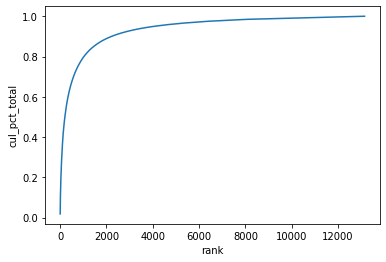

In [ ]:
sns.lineplot(x='rank', y='cul_pct_total', data=word_count);

In [ ]:
tokens = []
for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    doc_tokens = [token.text for token in doc]
    tokens.append(doc_tokens)

shops['tokens'] = tokens

In [ ]:
shops.tokens.head()

0    [Love, love, loved, the, atmosphere!, Every, c...
1    [Listed, in, Date, Night:, Austin,, Ambiance, ...
2    [Listed, in, Brunch, Spots, I, loved, the, ecl...
3    [Very, cool, decor!, Good, drinks, Nice, seati...
4    [They, are, located, within, the, Northcross, ...
Name: tokens, dtype: object

In [ ]:
shops['tokens'] = shops['full_review_text'].apply(tokenize)

In [ ]:
shops['tokens'].head()

0    [love, love, loved, the, atmosphere, every, co...
1    [listed, in, date, night, austin, ambiance, in...
2    [listed, in, brunch, spots, i, loved, the, ecl...
3    [very, cool, decor, good, drinks, nice, seatin...
4    [they, are, located, within, the, northcross, ...
Name: tokens, dtype: object

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [ ]:
tokens = []

""" Update those tokens w/o stopwords"""
for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

shops['tokens'] = tokens

In [ ]:
shops.lemmas.head()

0    [love, love, love, atmosphere, corner, style, ...
1    [list, date, night, austin, ambiance, austin, ...
2    [list, brunch, spots, love, eclectic, homey, p...
3    [cool, decor, good, drink, nice, seating, over...
4    [locate, northcross, mall, shopping, center, f...
Name: lemmas, dtype: object

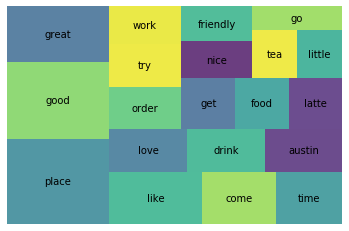

In [ ]:
squarify.plot(sizes=word_count[word_count['rank'] <=20]['pct_total'], label=word_count[word_count['rank'] <=20]['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [ ]:
STOP_WORDS = nlp.Defaults.stop_words.union(['a', 'an', 'I', 'coffee', 'i', 'Coffee', 'it', "it's", 'it.', 'the', 'this','shop', 'Shop', ' ', '-', ' - '])

In [ ]:
tokens = []

for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc: 
        if token.text not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
shops['tokens'] = tokens

In [ ]:
word_count.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
29,,4328,14861,1.0,0.041907,0.041907,0.568277
81,place,3865,6002,2.0,0.016925,0.058832,0.507484
136,good,3586,5385,3.0,0.015185,0.074017,0.470851
131,great,2845,3936,4.0,0.011099,0.085116,0.373556
139,like,2259,3355,5.0,0.009461,0.094577,0.296612


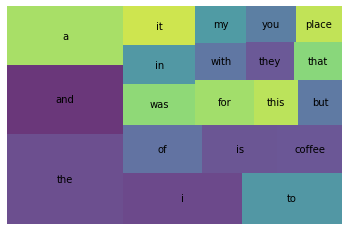

In [ ]:
squarify.plot(sizes=word_count[word_count['rank'] <=20]['pct_total'], label=word_count[word_count['rank'] <=20]['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [ ]:
def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)
    
    # Something goes here :P
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_!= 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

In [ ]:
shops['lemmas'] = shops['full_review_text'].apply(get_lemmas)

In [ ]:
shops.head(20)

,coffee_shop_name,full_review_text,star_rating,Good_Bad,tokens,lemmas
0,The Factory - Cafe With a Soul,Love love loved the atmosphere! Every corner o...,5.0,Good,"[love, love, love, love, loved, loved, atmosph...","[love, love, love, atmosphere, corner, coffee,..."
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aust...",4.0,Good,"[listed, listed, date, date, night:, night:, a...","[list, Date, Night, Austin, Ambiance, Austin, ..."
2,The Factory - Cafe With a Soul,Listed in Brunch Spots I loved the eclectic an...,4.0,Good,"[listed, listed, brunch, brunch, spots, spots,...","[list, Brunch, Spots, love, eclectic, homey, p..."
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating How...,2.0,Bad,"[very, cool, cool, decor!, decor!, good, good,...","[cool, decor, good, drink, nice, seating, , ..."
4,The Factory - Cafe With a Soul,They are located within the Northcross mall sh...,4.0,Good,"[they, located, located, northcross, northcros...","[locate, Northcross, mall, shopping, center, f..."
5,The Factory - Cafe With a Soul,Very cute cafe! I think from the moment I step...,4.0,Good,"[very, cute, cute, cafe!, cafe!, think, think,...","[cute, cafe, think, moment, step, find, cute, ..."
6,The Factory - Cafe With a Soul,"Listed in ""Nuptial Coffee Bliss!"", Anderson La...",4.0,Good,"[listed, listed, ""nuptial, ""nuptial, bliss!"",,...","[list, Nuptial, Coffee, Bliss, Anderson, Lane,..."
7,The Factory - Cafe With a Soul,Love this place! 5 stars for cleanliness 5 st...,5.0,Good,"[love, love, place!, place!, 5, 5, stars, star...","[love, place, , 5, star, cleanliness, 5, star..."
8,The Factory - Cafe With a Soul,"Ok, let's try this approach... Pros: Music Se...",3.0,Bad,"[ok,, ok,, let's, let's, try, try, approach......","[ok, let, try, approach, , pro, music, Seatin..."
9,The Factory - Cafe With a Soul,This place has been shown on my social media f...,5.0,Good,"[this, place, place, shown, shown, social, soc...","[place, show, social, medium, day, finally, vi..."


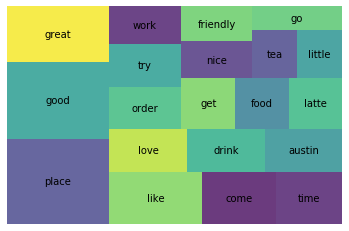

In [ ]:
squarify.plot(sizes=word_count[word_count['rank'] <=20]['pct_total'], label=word_count[word_count['rank'] <=20]['word'], alpha=.8 )
plt.axis('off')
plt.show()

,coffee_shop_name,full_review_text,star_rating,Good_Bad,tokens,lemmas
0,The Factory - Cafe With a Soul,Love love loved the atmosphere! Every corner o...,5.0,Good,"[love, love, loved, the, atmosphere, every, co...","[love, love, love, atmosphere, corner, coffee,..."
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aust...",4.0,Good,"[listed, in, date, night, austin, ambiance, in...","[list, Date, Night, Austin, Ambiance, Austin, ..."
2,The Factory - Cafe With a Soul,Listed in Brunch Spots I loved the eclectic an...,4.0,Good,"[listed, in, brunch, spots, i, loved, the, ecl...","[list, Brunch, Spots, love, eclectic, homey, p..."
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating How...,2.0,Bad,"[very, cool, decor, good, drinks, nice, seatin...","[cool, decor, good, drink, nice, seating, , ..."
4,The Factory - Cafe With a Soul,They are located within the Northcross mall sh...,4.0,Good,"[they, are, located, within, the, northcross, ...","[locate, Northcross, mall, shopping, center, f..."
5,The Factory - Cafe With a Soul,Very cute cafe! I think from the moment I step...,4.0,Good,"[very, cute, cafe, i, think, from, the, moment...","[cute, cafe, think, moment, step, find, cute, ..."
6,The Factory - Cafe With a Soul,"Listed in ""Nuptial Coffee Bliss!"", Anderson La...",4.0,Good,"[listed, in, nuptial, coffee, bliss, anderson,...","[list, Nuptial, Coffee, Bliss, Anderson, Lane,..."
7,The Factory - Cafe With a Soul,Love this place! 5 stars for cleanliness 5 st...,5.0,Good,"[love, this, place, 5, stars, for, cleanliness...","[love, place, , 5, star, cleanliness, 5, star..."
8,The Factory - Cafe With a Soul,"Ok, let's try this approach... Pros: Music Se...",3.0,Bad,"[ok, lets, try, this, approach, pros, music, s...","[ok, let, try, approach, , pro, music, Seatin..."
9,The Factory - Cafe With a Soul,This place has been shown on my social media f...,5.0,Good,"[this, place, has, been, shown, on, my, social...","[place, show, social, medium, day, finally, vi..."


In [ ]:
word_count = count(shops.tokens)
word_count.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
1,,4328,14861,1.0,0.035367,0.035367,0.568277
88,the,3915,6823,2.0,0.016238,0.051604,0.514049
117,place,3013,4236,3.0,0.010081,0.061685,0.395614
92,great,2426,3232,4.0,0.007692,0.069377,0.318540
204,like,2021,2880,5.0,0.006854,0.076231,0.265362


In [ ]:
STOP_WORDS

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'Coffee',
 'I',
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'coffee',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'fort

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play the the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

